# Task - 3 CAR PRICE PREDICTION WITH MACHINE LEARNING

## Problem Statement
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

### Importing Libraries


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df=pd.read_csv('datasets/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Duplicates

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

### Categorize object and numerical data

In [16]:
import pandas as pd

numerical_feat = []
categorical_feat = []

for i in df.columns:
    try:
        df[i].astype(float)
        numerical_feat.append(i)
    except ValueError:
        categorical_feat.append(i)

print("Numerical Features:", numerical_feat)
print("Categorical Features:", categorical_feat)


Numerical Features: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Categorical Features: ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [19]:
for i in df.columns:
    try:
        df[i].astype(float)
    except ValueError:
        print(f"Column '{i}' contains non-numeric values.")


Column 'Car_Name' contains non-numeric values.
Column 'Fuel_Type' contains non-numeric values.
Column 'Selling_type' contains non-numeric values.
Column 'Transmission' contains non-numeric values.


In [28]:
# Use one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_feat)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)


                             Year  Selling_Price  Present_Price  Driven_kms  \
Year                     1.000000       0.234369      -0.053167   -0.525714   
Selling_Price            0.234369       1.000000       0.876305    0.028566   
Present_Price           -0.053167       0.876305       1.000000    0.205224   
Driven_kms              -0.525714       0.028566       0.205224    1.000000   
Owner                   -0.181639      -0.087880       0.009948    0.089367   
...                           ...            ...            ...         ...   
Fuel_Type_Petrol        -0.052197      -0.531636      -0.456829   -0.173595   
Selling_type_Dealer      0.036820       0.553851       0.511779    0.101030   
Selling_type_Individual -0.036820      -0.553851      -0.511779   -0.101030   
Transmission_Automatic  -0.003434       0.348869       0.334326    0.163881   
Transmission_Manual      0.003434      -0.348869      -0.334326   -0.163881   

                            Owner  Car_Name_800  Ca

In [29]:
# Extract only the numerical features
df_numerical = df[numerical_feat]

# Calculate the correlation matrix
correlation_matrix2 = df_numerical.corr()

# Display the correlation matrix
print(correlation_matrix2)


                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.234369      -0.053167   -0.525714 -0.181639
Selling_Price  0.234369       1.000000       0.876305    0.028566 -0.087880
Present_Price -0.053167       0.876305       1.000000    0.205224  0.009948
Driven_kms    -0.525714       0.028566       0.205224    1.000000  0.089367
Owner         -0.181639      -0.087880       0.009948    0.089367  1.000000


### Categorial Type

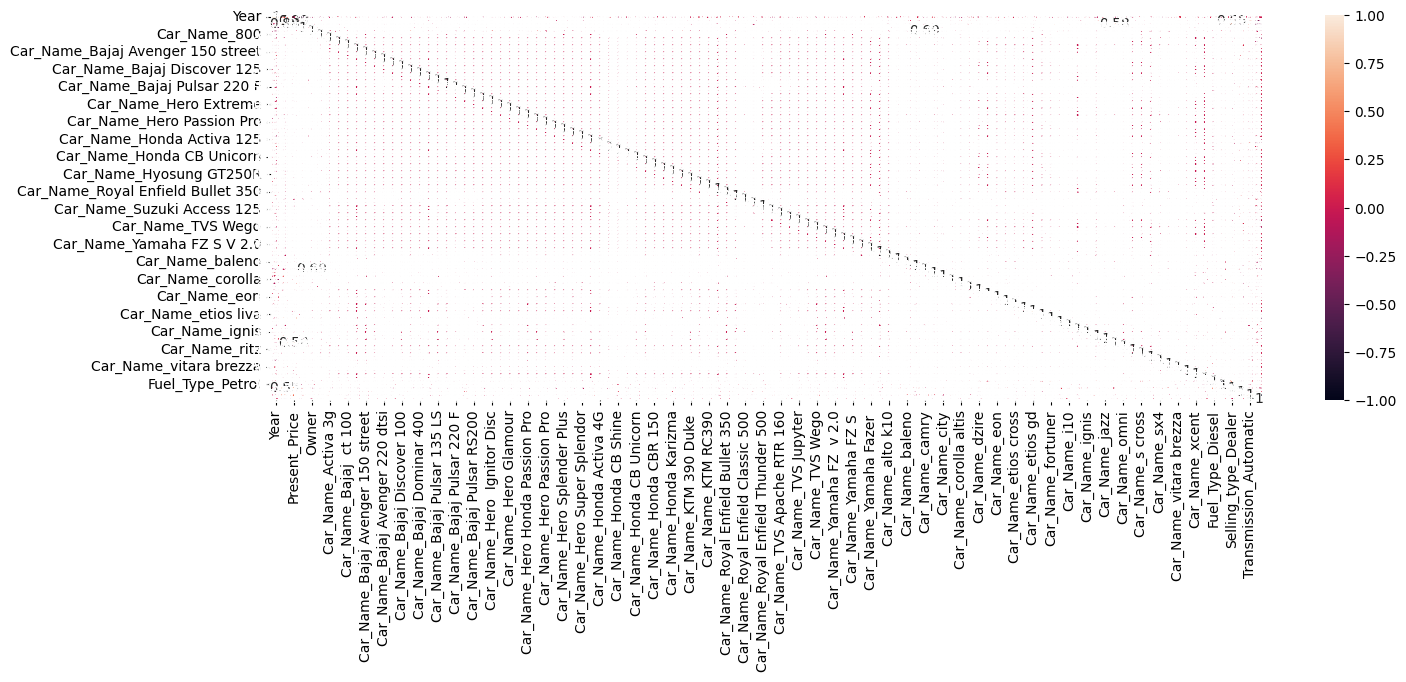

In [30]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.1)

### Numerical Type

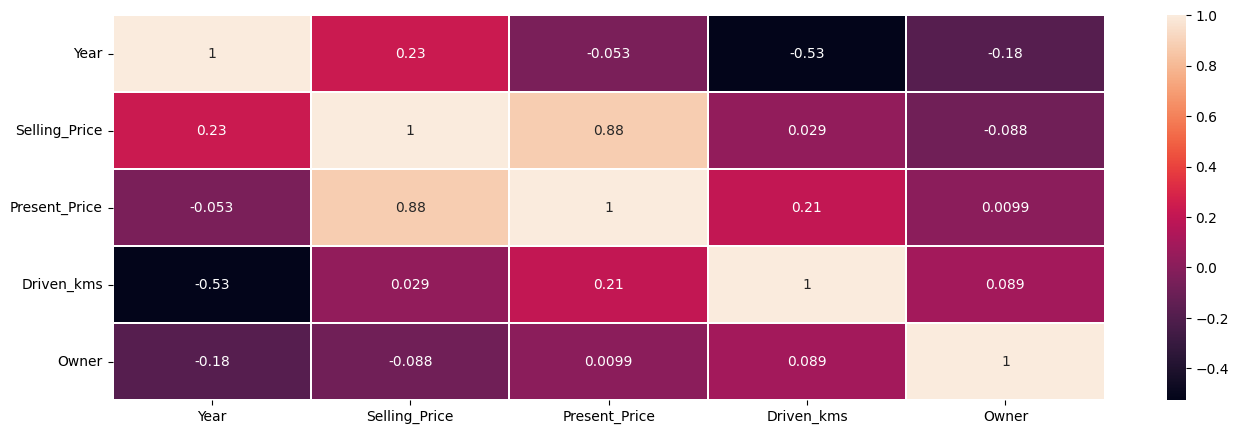

In [31]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(correlation_matrix2, annot=True, linewidths=.1)

In [32]:
df[categorical_feat].head()

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


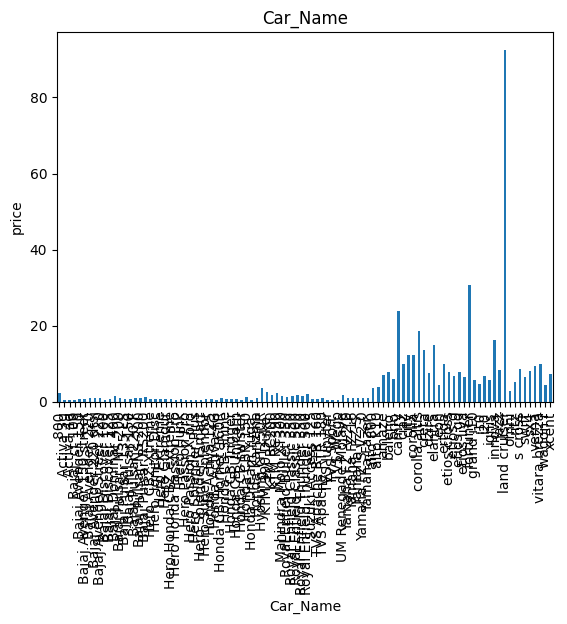

<Figure size 1000x1000 with 0 Axes>

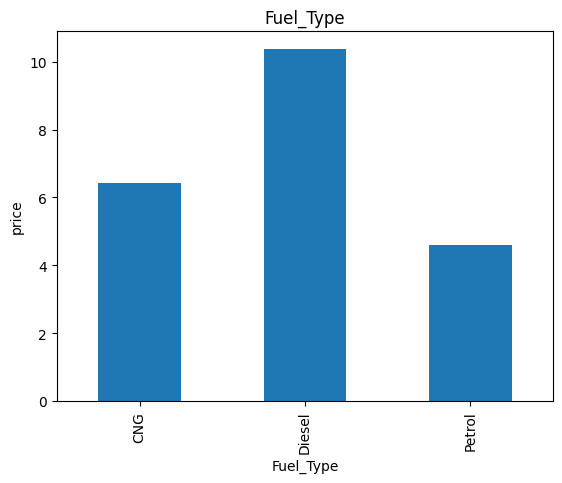

<Figure size 1000x1000 with 0 Axes>

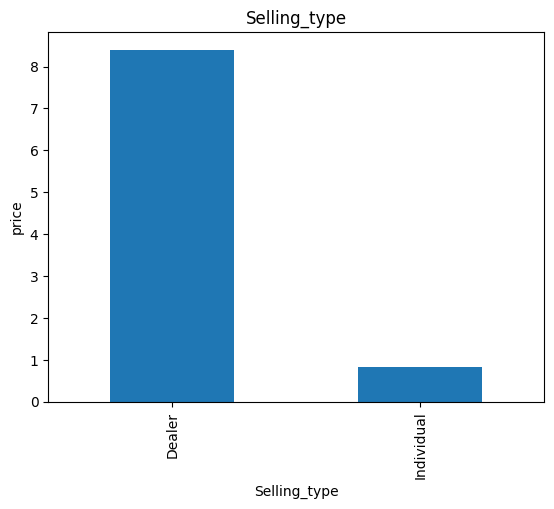

<Figure size 1000x1000 with 0 Axes>

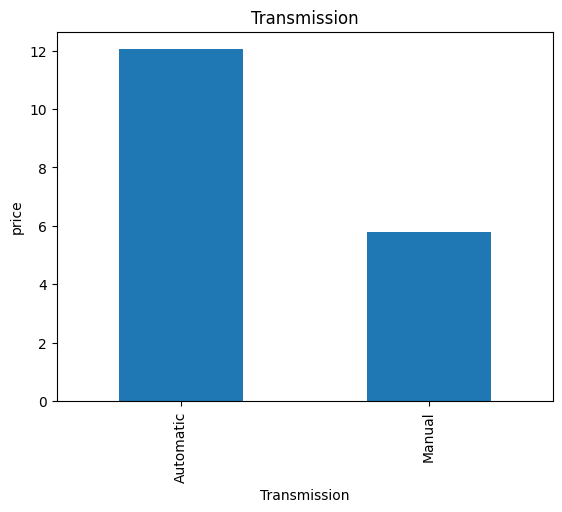

<Figure size 1000x1000 with 0 Axes>

In [33]:
## Lets Find the realtionship between them and Sale PRice

for feature in categorical_feat:
    df.groupby(feature)['Present_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show()

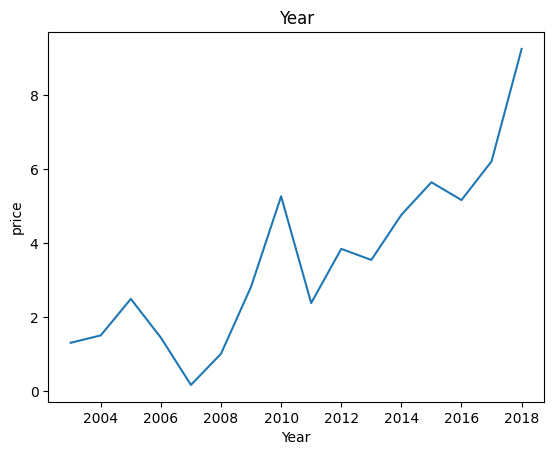

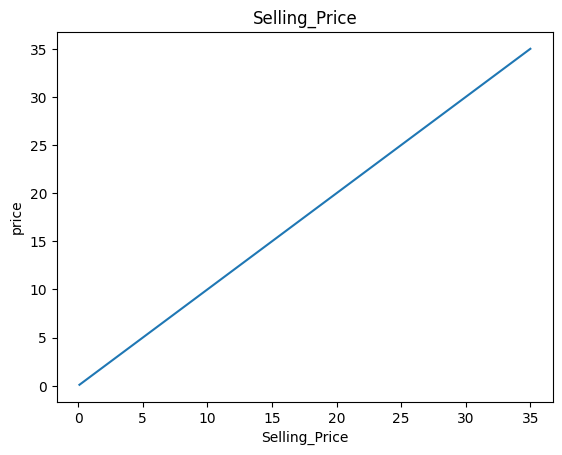

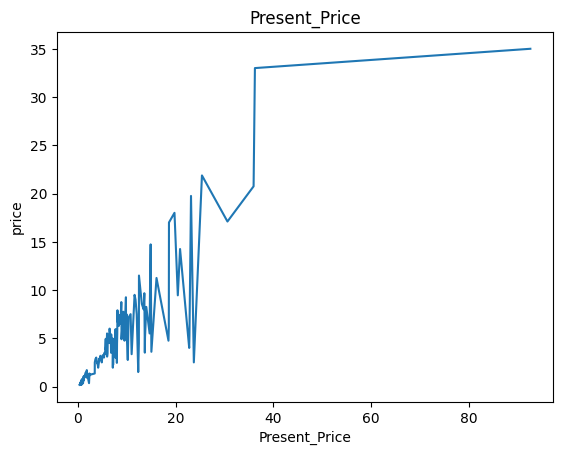

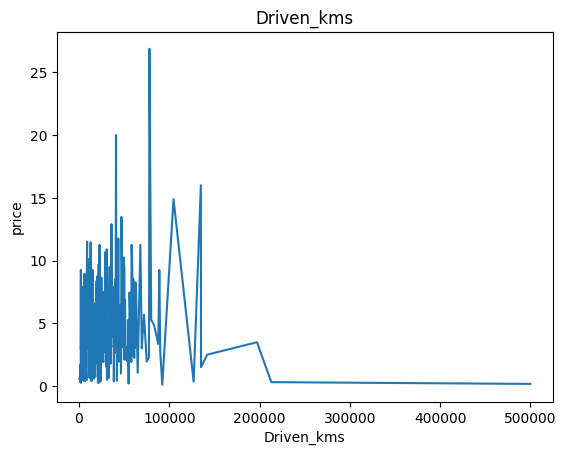

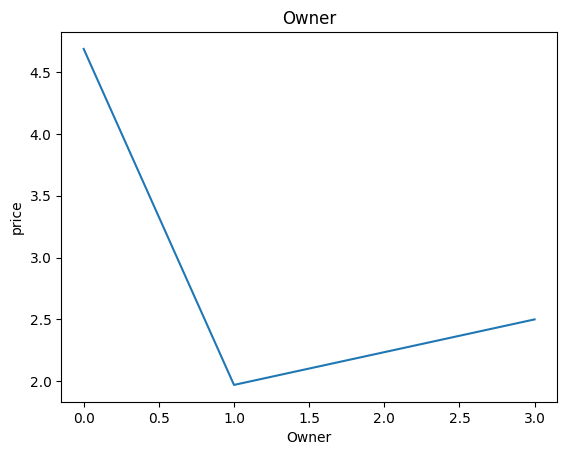

In [34]:
## Lets Find the realtionship between them and Sale PRice

for feature in numerical_feat:
    df.groupby(feature)['Selling_Price'].mean().plot()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [35]:
discrete_feature=[feature for feature in numerical_feat if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [36]:
discrete_feature

['Year', 'Owner']

In [37]:
df[discrete_feature].head()

,Year,Owner
0,2014,0
1,2013,0
2,2017,0
3,2011,0
4,2014,0


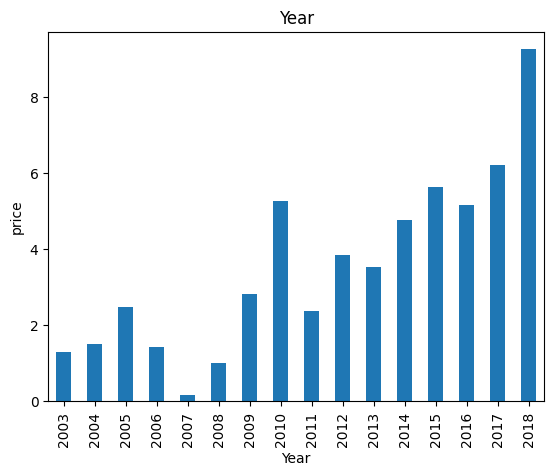

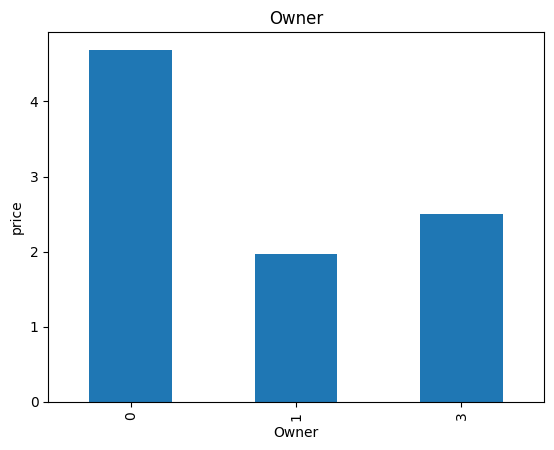

In [38]:
for feature in discrete_feature:
    df.groupby(feature)['Selling_Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [39]:
continuous_feature=[feature for feature in numerical_feat if feature not in discrete_feature]
continuous_feature

['Selling_Price', 'Present_Price', 'Driven_kms']

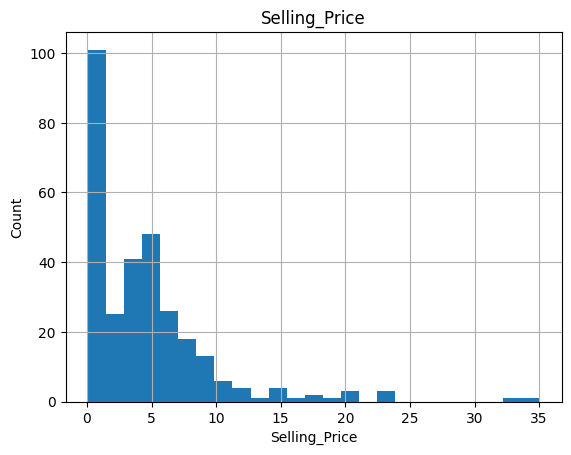

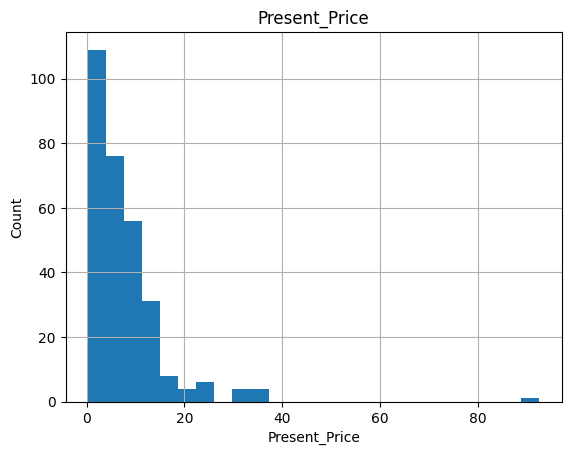

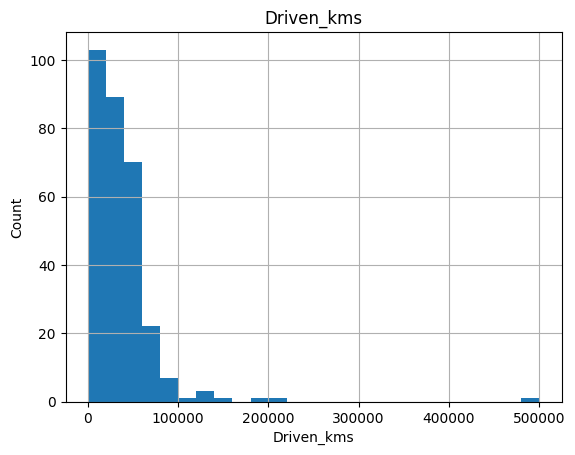

In [40]:
for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Unique

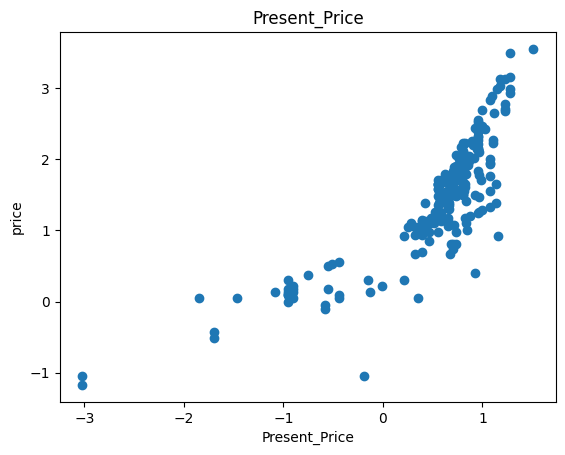

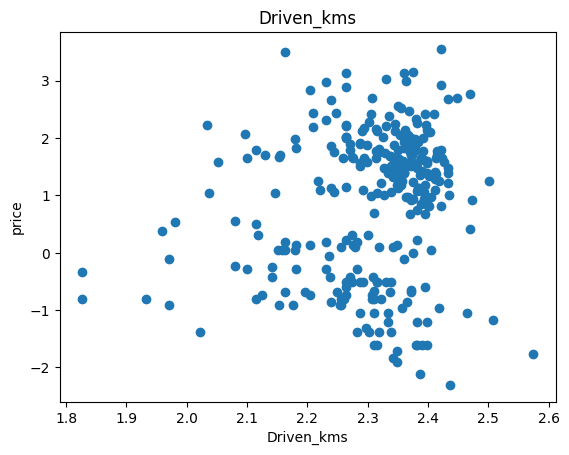

In [43]:
import numpy as np

for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['price']=np.log(df['Selling_Price'])
        plt.scatter(df[feature],df['Selling_Price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

### Outliers

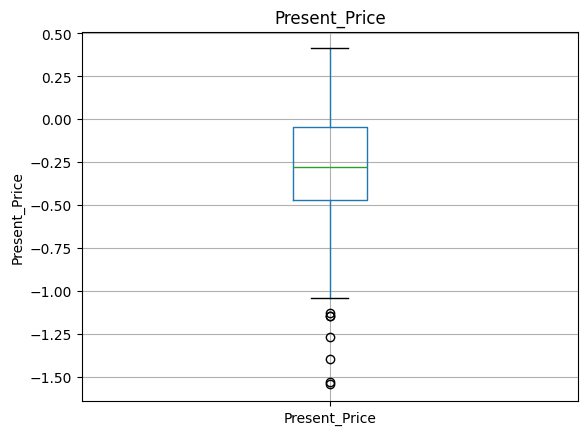

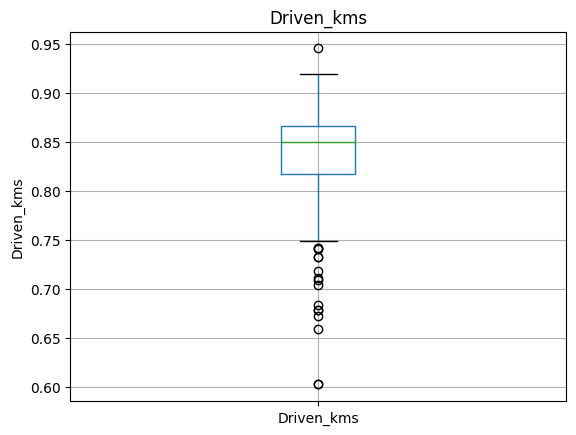

In [44]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Numerical Feat

In [45]:
x=df[numerical_feat]
x

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,1.208960,-0.610842,0.842747,0
1,2013,1.558145,-0.206571,0.861766,0
2,2017,1.981001,-0.189410,0.778960,0
3,2011,1.047319,-1.041731,0.763923,0
4,2014,1.526056,-0.421519,0.861256,0
...,...,...,...,...,...
296,2016,2.251292,-0.109259,0.852305,0
297,2015,1.386294,-0.555520,0.874671,0
298,2009,1.208960,-0.133998,0.888812,0
299,2017,2.442347,-0.076309,0.792459,0


In [46]:
y = df.iloc[:,-1:]
y

,price
0,0.189761
1,0.443496
2,0.683603
3,0.046234
4,0.422687
...,...
296,0.811504
297,0.326634
298,0.189761
299,0.892959


In [47]:
from sklearn.decomposition import PCA
feat = PCA(n_components=5)
feat

PCA(n_components=5)

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Assuming 'x' is your data
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or other strategies
x_imputed = imputer.fit_transform(x)

# Apply PCA
feat = PCA(n_components=5)
feat.fit(x_imputed)


PCA(n_components=5)

In [52]:
x_no_nan = x.dropna()

# Apply PCA

feat = PCA(n_components=
5
)
feat.fit(x_no_nan)

PCA(n_components=5)

In [53]:
feat.components_

array([[-0.993568  , -0.11199243,  0.00366931,  0.0073795 ,  0.01457378],
       [-0.09257461,  0.83483884,  0.54121339,  0.01122884, -0.03789496],
       [ 0.0163758 , -0.01290795,  0.09247819, -0.00305275,  0.99549168],
       [-0.06282254,  0.53871515, -0.83499182, -0.03635852,  0.08547537],
       [-0.00614205, -0.01100798,  0.03620841, -0.99924381, -0.00646961]])

In [54]:
feat.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4'], dtype=object)

In [55]:
feat.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}